# Compute discrete laplacian using Graph Neural Network

Consider the problem $Lx=b$ where $L$ is the graph laplacian.
Our aim is to find $b$ given $x$ and the graph $G=(V,E)$ using a graph neural network.

Change working directory (remember to replace "path-to-your-directory" with your own directory)

In [ ]:
%cd /"path-to-your-directory"/GP-GNN

Import used source files


In [2]:
import numpy as np
import sys
import time
from tqdm import trange

from src.graph.graph2D import Graph2D
from src.graph.graphObject import GraphObject
from src.gnn.dataset import get_datasets, get_torch_graph
from src.gnn.buildModel import BuildModel

Import neural network used

In [3]:
from examples.discrete_laplacian.discreteLaplacianGNN import DiscreteLaplacianGNN

Load plot function

In [4]:
from examples.discrete_laplacian.main import plot_testing

Force matplotlib to plot inline


In [5]:
%matplotlib inline

## Dataset

Create dataset

In [6]:
n_items = 1000

for i in trange(n_items, ncols=100, file=sys.stdout):
    n = np.random.randint(100, 200)
    g = Graph2D.get_default_graph(n_vertexes=n)
    inp = np.random.uniform(0, 1, size=(n, 1))
    out = g.get_discrete_laplacian(inp)
    graph = GraphObject(g.vertexes, g.get_edges(), in_features=inp, out_features=out)
    graph.save(f"examples/discrete_laplacian/dataset/graph_{i}")

100%|██████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 610.06it/s]


## Build and train the network

Read dataset

In [7]:
batch_size = 4

train, val, test = get_datasets('examples/discrete_laplacian/dataset/graph', batch_size= batch_size, num_el=n_items, division=[70, 20, 10])

Reading training data...
100%|███████████████████████████████████████████████████████████| 700/700 [00:00<00:00, 6623.96it/s]
Reading validation data...
100%|███████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 6010.62it/s]
Reading testing data...
100%|███████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6732.43it/s]


Build model

In [8]:
model = BuildModel(DiscreteLaplacianGNN(), train, val, "examples/discrete_laplacian/best_model")
model.summary()

Layer (type:depth-idx)                   Output Shape              Param #
├─Encoder: 1-1                           [-1, 1]                   --
|    └─Sequential: 2-1                   [-1, 1]                   --
|    └─Sequential: 2-2                   [-1]                      --
├─ModuleList: 1                          []                        --
|    └─MessagePassingBlock: 2-3          [-1, 1]                   --
|    |    └─Sequential: 3-1              [-1, 1]                   3
|    |    └─SumAggregation: 3-2          [-1, 1]                   --
|    |    └─Sequential: 3-3              [-1, 1]                   3
├─Decoder: 1-2                           [-1, 1]                   --
|    └─Sequential: 2-4                   [-1, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01


Train the model

In [9]:
model.train(1000, patience=5)

EPOCH   0: 100%|████████████████████████████| 175/175 [00:00<00:00, 303.77it/s, batch loss=1.36e+00]
Current loss - training: 2.07e+00 validation: 1.33e+00

EPOCH   1: 100%|████████████████████████████| 175/175 [00:00<00:00, 320.64it/s, batch loss=8.29e-01]
Current loss - training: 1.08e+00 validation: 9.18e-01

EPOCH   2: 100%|████████████████████████████| 175/175 [00:00<00:00, 232.62it/s, batch loss=8.58e-01]
Current loss - training: 8.44e-01 validation: 7.79e-01

EPOCH   3: 100%|████████████████████████████| 175/175 [00:00<00:00, 293.02it/s, batch loss=5.92e-01]
Current loss - training: 7.33e-01 validation: 6.85e-01

EPOCH   4: 100%|████████████████████████████| 175/175 [00:00<00:00, 260.26it/s, batch loss=6.82e-01]
Current loss - training: 6.47e-01 validation: 6.07e-01

EPOCH   5: 100%|████████████████████████████| 175/175 [00:00<00:00, 381.36it/s, batch loss=4.76e-01]
Current loss - training: 5.73e-01 validation: 5.37e-01

EPOCH   6: 100%|████████████████████████████| 175/175 [00:

Now, we plot the training and validation losses

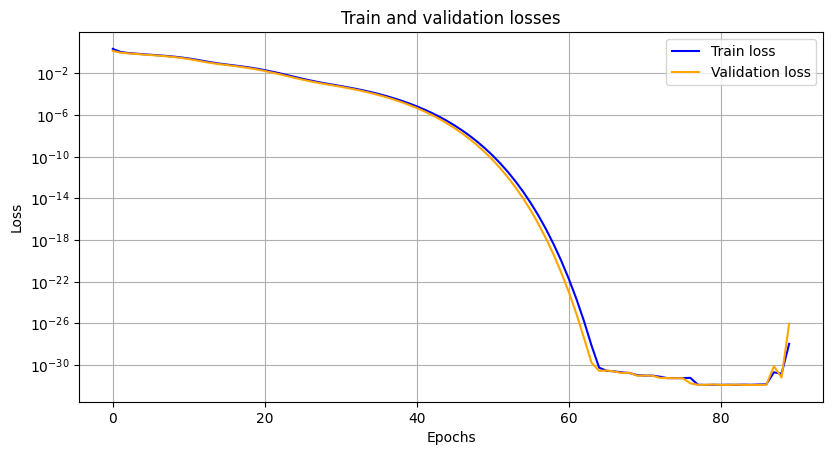

In [10]:
model.plot_training()

## Test on testing set

Now, we test our model on the training set, computing for each graph the relative errors.

In [11]:
model.test(test)


Testing graph neural network:
Graph   1 with 124 nodes, test loss is 1.15e-32, relative error is 4.55e-16
Graph   2 with 149 nodes, test loss is 1.19e-32, relative error is 2.62e-16
Graph   3 with 112 nodes, test loss is 1.79e-32, relative error is 3.63e-16
Graph   4 with 136 nodes, test loss is 1.26e-32, relative error is 8.94e-16
Graph   5 with 143 nodes, test loss is 7.99e-33, relative error is 2.91e-16
Graph   6 with 171 nodes, test loss is 8.17e-33, relative error is 1.01e-15
Graph   7 with 180 nodes, test loss is 1.24e-32, relative error is 3.42e-16
Graph   8 with 112 nodes, test loss is 9.84e-33, relative error is 2.11e-16
Graph   9 with 169 nodes, test loss is 1.47e-32, relative error is 3.57e-16
Graph  10 with 161 nodes, test loss is 1.38e-32, relative error is 5.60e-16
Graph  11 with 113 nodes, test loss is 1.00e-32, relative error is 4.80e-16
Graph  12 with 150 nodes, test loss is 1.34e-32, relative error is 3.83e-16
Graph  13 with 101 nodes, test loss is 4.86e-33, relative

## More testing

We try increasing the graph size to stress our network and see the behaviour. Moreover, we compare the time needed using the definition and the time needed by our network.
We recall that the discrete laplacian can be computed avoiding the matrix multiplication $Lx$ (which can be very expansive) using the following definition:
$$
    (Lx)(v) = \sum_{w \in A_v}{x(v) - x(w)} \qquad \forall v \in V
$$
Where $A_v$ denotes the set of vertices adjacent to $v$ (i.e. directly connected to $v$ through an edge).


In [12]:
nodes = [10, 50, 100, 500, 1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
mul_times = []
std_times = []
gnn_times = []
mul_errs = []
gnn_errs = []
for n_vertexes in nodes:
    print(f"\nGraph with {n_vertexes} nodes")
    # Generate graph and signal
    init_time = time.time()
    g = Graph2D.get_default_graph(n_vertexes)
    inp = np.random.uniform(0, 1, size=(n_vertexes, 1))
    data = get_torch_graph(g.vertexes, g.get_edges(), inp)
    print(f"Graph built in {(time.time() - init_time):.2e} seconds")
    if n_vertexes <= 20000:
        # Discrete laplacian multiplying Lx
        L = g.get_graph_laplacian()
        init_time = time.time()
        mul_out = L @ inp
        mul_times.append(time.time() - init_time)
        print(f"Matrix multiplication, time elapsed is {mul_times[-1]:.2e} seconds")
    else:
        # Not enough RAM to allocate L matrix :(
        mul_times.append(np.inf)
        mul_out=0
    # Discrete laplacian using the definition
    init_time = time.time()
    standard_out = g.get_discrete_laplacian(inp)
    std_times.append(time.time() - init_time)
    print(f"Using definition, time elapsed is {std_times[-1]:.2e} seconds")
    # Discrete laplacian using gnn
    init_time = time.time()
    gnn_out = model(data.x, data.edge_index, data.edge_attr)
    gnn_times.append(time.time() - init_time)
    print(f"Using the gnn, time elapsed is {gnn_times[-1]:.2e} seconds")

    # Computing errors
    gnn_out = gnn_out.detach().numpy()
    rel_errs = abs(standard_out - gnn_out)/abs(standard_out)
    gnn_errs.append(np.mean(rel_errs))
    print(f"Definition vs GNN relative error is {gnn_errs[-1]:.2e}")
    rel_errs = abs(standard_out - mul_out)/abs(standard_out)
    if n_vertexes <= 20000:
        mul_errs.append(np.mean(rel_errs))
        print(f"Definition vs multiplication relative error is {mul_errs[-1]:.2e}")
    else:
        mul_errs.append(np.inf)



Graph with 10 nodes
Graph built in 3.85e-04 seconds
Matrix multiplication, time elapsed is 2.00e-05 seconds
Using definition, time elapsed is 6.41e-05 seconds
Using the gnn, time elapsed is 1.27e-03 seconds
Definition vs GNN relative error is 2.04e-15
Definition vs multiplication relative error is 2.04e-17

Graph with 50 nodes
Graph built in 5.49e-04 seconds
Matrix multiplication, time elapsed is 2.22e-05 seconds
Using definition, time elapsed is 4.78e-04 seconds
Using the gnn, time elapsed is 4.67e-04 seconds
Definition vs GNN relative error is 1.98e-15
Definition vs multiplication relative error is 5.08e-17

Graph with 100 nodes
Graph built in 5.36e-04 seconds
Matrix multiplication, time elapsed is 8.54e-05 seconds
Using definition, time elapsed is 1.59e-03 seconds
Using the gnn, time elapsed is 5.69e-04 seconds
Definition vs GNN relative error is 2.84e-16
Definition vs multiplication relative error is 8.79e-17

Graph with 500 nodes
Graph built in 6.39e-03 seconds
Matrix multiplicat

### Computation time comparison

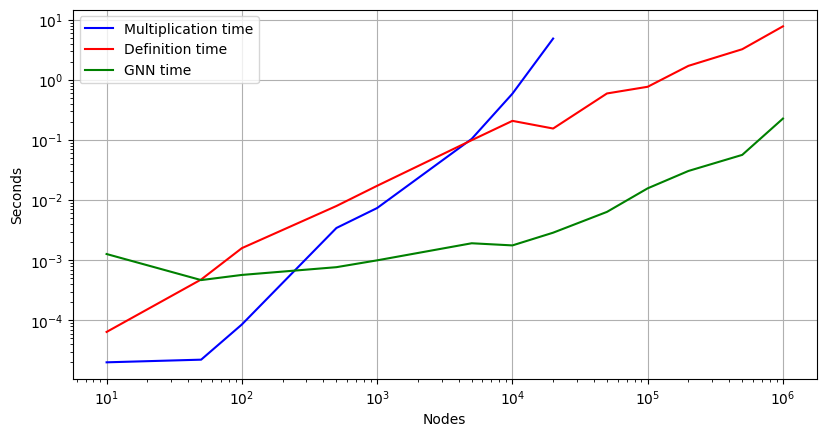

In [13]:
plot_testing(nodes, [mul_times, std_times, gnn_times],
             colors=["blue", "red", "green"],
             labels=["Multiplication time", "Definition time", "GNN time"],
             y_label="Seconds")

### Errors comparison

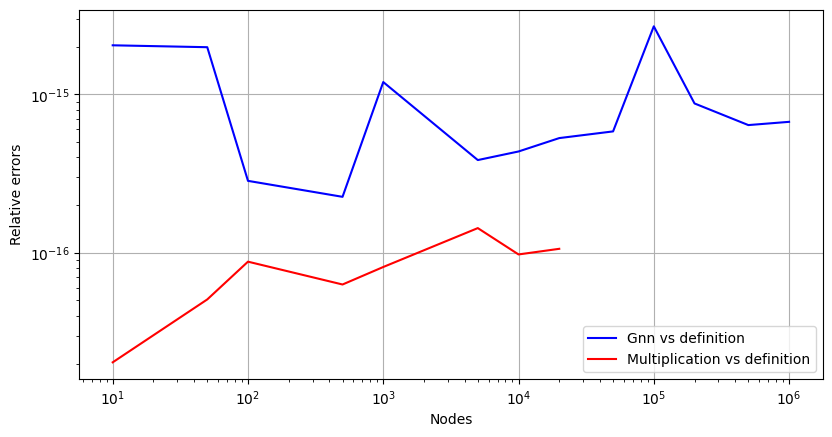

In [14]:
plot_testing(nodes, [gnn_errs, mul_errs],
             colors=["blue", "red"],
             labels=["Gnn vs definition", "Multiplication vs definition"],
             y_label="Relative errors")